In [21]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import collections, numpy

In [4]:
bo=pd.read_excel('bowler/BowlerOuter.xlsx')
ba=pd.read_excel('batsman/BatsmanOuter.xlsx')

In [5]:
bo=bo.rename(columns={'bowler':'Player'})
ba=ba.rename(columns={'batsman':'Player'})

In [6]:
ar=pd.merge(bo,ba,on='Player',how='outer')
ar1=ar.drop(['death_over','over','wide_runs','WoPerOver','noball_runs','powerplay_over','4\'s','6\'s','50\'s'],axis=1)
ar2=ar1.drop(['NoPerOver','100\'s','no of balls','30\'s','total_runs'],axis=1)
ar2.to_csv('allr.csv',index=False)

In [7]:
ar2.head()

,Player,total_overs,avg_economy,wickets,avg.runs,batsman_runs,strike
0,A Ashish Reddy,45.0,8.888889,19.0,12.173913,280.0,142.857143
1,A Chandila,39.0,6.282051,11.0,2.000000,4.0,57.142857
2,A Choudhary,17.0,8.470588,5.0,8.333333,25.0,125.000000
3,A Dananjaya,4.0,12.000000,0.0,4.000000,4.0,80.000000
4,A Flintoff,11.0,9.636364,2.0,20.666667,62.0,108.771930


In [8]:
ar2['rpw']=ar2['batsman_runs']/ar2['wickets']

In [9]:
ar3=ar2.sort_values(by='rpw')
ar3.head()

,Player,total_overs,avg_economy,wickets,avg.runs,batsman_runs,strike,rpw
312,S Lamichhane,35.0,8.657143,14.0,0.0,0.0,0.0,0.0
71,C Nanda,8.0,7.250000,2.0,0.0,0.0,0.0,0.0
132,IC Pandey,77.0,7.909091,19.0,0.0,0.0,0.0,0.0
400,YA Abdulla,35.0,8.885714,15.0,0.0,0.0,0.0,0.0
256,P Raj,5.0,12.000000,1.0,0.0,0.0,0.0,0.0


In [54]:
#ar3.to_csv('allr1.csv',index=False)
ar4=ar3.drop(['Player'],axis=1)
ar5=ar4.rpw<=112
ar6=ar4[ar5]
ar7=ar6.rpw>2.21
ar8=ar6[ar7]
ar8.tail()

,total_overs,avg_economy,wickets,avg.runs,batsman_runs,strike,rpw
95,38.0,8.368421,6.0,11.888889,535.0,124.129930,89.166667
119,13.0,7.461538,5.0,16.518519,446.0,126.345609,89.200000
375,25.0,7.920000,7.0,17.333333,676.0,115.161840,96.571429
291,13.0,7.230769,3.0,15.523810,326.0,136.974790,108.666667
180,29.0,7.517241,9.0,27.805556,1001.0,132.058047,111.222222


In [55]:
from sklearn import preprocessing

x = ar8.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.tail()

,0,1,2,3,4,5,6
153,0.065836,0.477796,0.029940,0.288600,0.146619,0.516382,0.797674
154,0.021352,0.378606,0.023952,0.438913,0.121951,0.529590,0.797980
155,0.042705,0.428750,0.035928,0.465368,0.185698,0.462925,0.865602
156,0.021352,0.353365,0.011976,0.406617,0.088692,0.592948,0.976557
157,0.049822,0.384698,0.047904,0.805375,0.275776,0.563640,1.000000


In [58]:
df.mean()

0    0.161269
1    0.480871
2    0.157167
3    0.314117
4    0.107539
5    0.491854
6    0.178599
dtype: float64

In [57]:
df.std()

0    0.208289
1    0.133947
2    0.214183
3    0.207143
4    0.173759
5    0.155036
6    0.237392
dtype: float64

In [38]:
y=collections.Counter(x)
x=dict(y)

In [53]:
l = []
m = []

In [54]:
for key, value in dict.items(x):
    l.append(key)
    m.append(value)

In [55]:
l

[0.0,
 0.03571428571428571,
 0.058823529411764705,
 0.0625,
 0.09090909090909091,
 0.10526315789473684,
 0.1111111111111111,
 0.11627906976744186,
 0.14285714285714285,
 0.16161616161616163,
 0.16666666666666666,
 0.18181818181818182,
 0.2,
 0.21052631578947367,
 0.21428571428571427,
 0.21568627450980393,
 0.22641509433962265,
 0.24390243902439024,
 0.25,
 0.2631578947368421,
 0.26666666666666666,
 0.2857142857142857,
 0.28888888888888886,
 0.2926829268292683,
 0.29850746268656714,
 0.3170731707317073,
 0.3333333333333333,
 0.33884297520661155,
 0.36363636363636365,
 0.4,
 0.4065934065934066,
 0.4235294117647059,
 0.46153846153846156,
 0.46808510638297873,
 0.47560975609756095,
 0.4883720930232558,
 0.5,
 0.52,
 0.55,
 0.56,
 0.5753424657534246,
 0.6,
 0.6097560975609756,
 0.6153846153846154,
 0.6363636363636364,
 0.6428571428571429,
 0.6626506024096386,
 0.6666666666666666,
 0.6808510638297872,
 0.6818181818181818,
 0.7142857142857143,
 0.75,
 0.7534246575342466,
 0.7692307692307693,


In [56]:
m

[11,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,

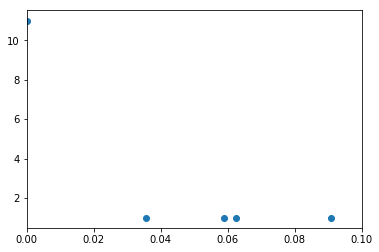

In [65]:
plt.xlim(0,0.1,0.0005)
plt.scatter(l,m)